In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [173]:
trainingData = pd.read_csv('./data/aps_failure_training_set.csv', na_values='na')
trainingData.head()

,id,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,2,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,3,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,4,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,5,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


In [174]:
testData = pd.read_csv('./data/aps_failure_test_set.csv', na_values='na')
testData.head()

,id,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,1,60,0.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,...,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,2,82,0.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,...,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,3,66002,2.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,...,495076.0,380368.0,440134.0,269556.0,1315022.0,153680.0,516.0,0.0,0.0,0.0
3,4,59816,NaN,1010.0,936.0,0.0,0.0,0.0,0.0,0.0,...,540820.0,243270.0,483302.0,485332.0,431376.0,210074.0,281662.0,3232.0,0.0,0.0
4,5,1814,NaN,156.0,140.0,0.0,0.0,0.0,0.0,0.0,...,7646.0,4144.0,18466.0,49782.0,3176.0,482.0,76.0,0.0,0.0,0.0


In [175]:
# check for unnecessary columns where standard deviation is 0 which means all values are the same
numeric_columns = trainingData.select_dtypes(include='number').columns
std_per_column = trainingData[numeric_columns].std() # standard deviation or 
unn_cols = std_per_column[std_per_column == 0].index
print(unn_cols)

# drop unnecessary columns
trainingData.drop(unn_cols, axis=1, inplace=True)
testData.drop(unn_cols, axis=1, inplace=True)

trainingData['class'].value_counts()

Index(['cd_000'], dtype='object')


class
neg    59000
pos     1000
Name: count, dtype: int64

In [176]:
# counter 
def countNoneValues(data):
    count = 0
    for i in data:
        if pd.isna(i):
            count += 1
    return count



In [177]:
Negative = trainingData.loc[trainingData['class'] == 'neg']
Positive = trainingData.loc[trainingData['class'] == 'pos']

Negative = Negative.drop(['class'], axis=1)
Positive = Positive.drop(['class'], axis=1)

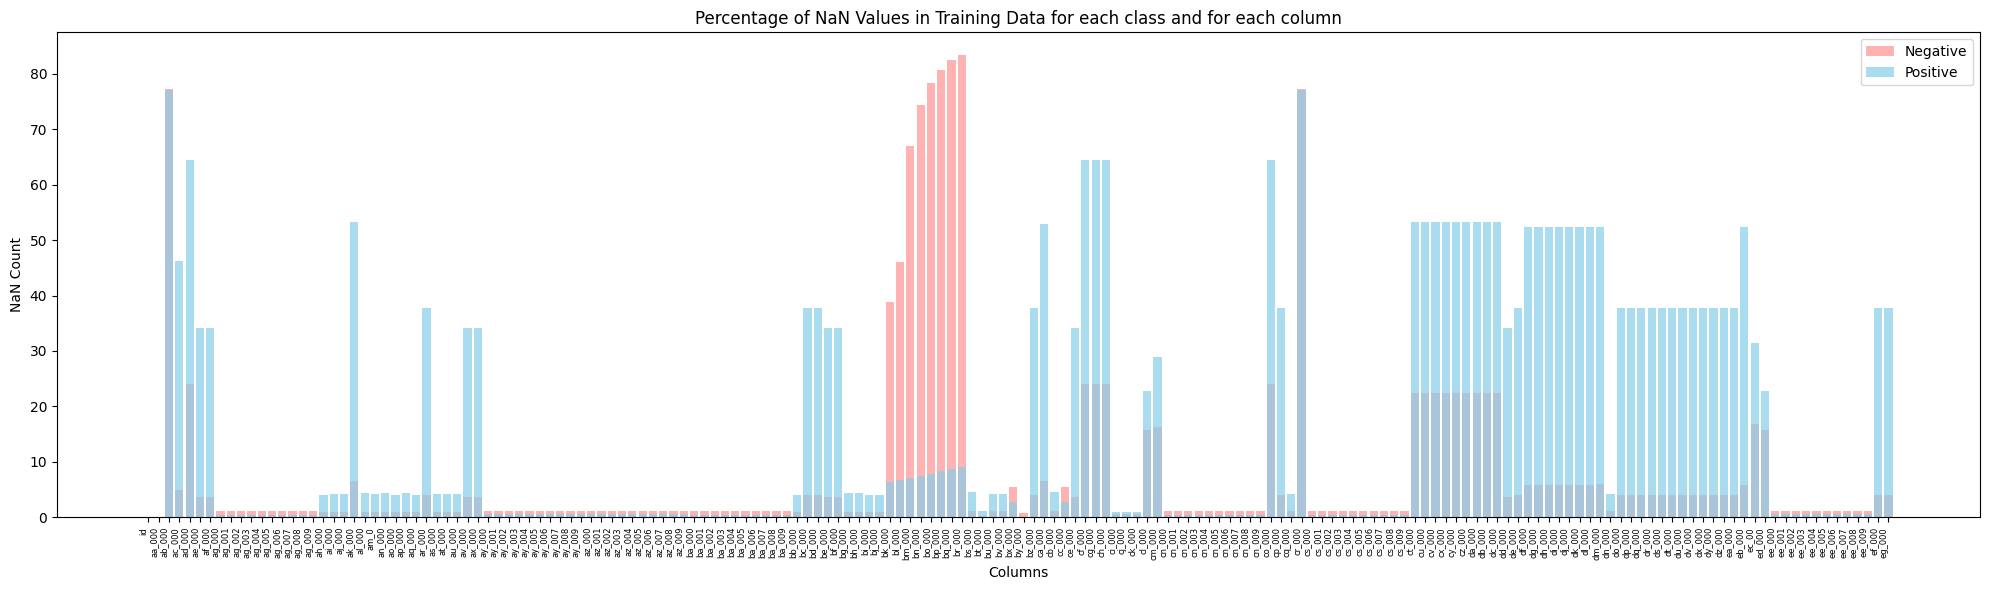

In [178]:
counterPositiveTrainingData = {}
for col in Positive.columns:
    counterPositiveTrainingData[col] = countNoneValues(Positive[col].values)/len(Positive[col].values) * 100
positive_nan_counts_df = pd.DataFrame(list(counterPositiveTrainingData.items()), columns=['Column', 'NaN Count'])
counterNegativeTrainingData = {}
for col in Negative.columns:
    counterNegativeTrainingData[col] = countNoneValues(Negative[col].values)/len(Negative[col].values) * 100
negative_nan_counts_df = pd.DataFrame(list(counterNegativeTrainingData.items()), columns=['Column', 'NaN Count'])


plt.figure(figsize=(20, 6))
plt.bar(negative_nan_counts_df['Column'], negative_nan_counts_df['NaN Count'], color='red', alpha=0.3, label='Negative')
plt.bar(positive_nan_counts_df['Column'], positive_nan_counts_df['NaN Count'], color='skyblue', alpha=0.7, label='Positive')
plt.xticks(rotation=90, ha='right', fontsize=6)
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.title('Percentage of NaN Values in Training Data for each class and for each column')
plt.legend() 
plt.tight_layout()
plt.show()

## data is imbalanced



In [179]:
# if percentage of none values are greater than %35 remove columns and print the colums that've been deleted
deletedColumsDueToNull = []
for col in trainingData.columns:
    if (countNoneValues(trainingData[col].values) / len(trainingData[col].values)) * 100 > 35:
        deletedColumsDueToNull.append(col)

print(deletedColumsDueToNull)
trainingData.drop(deletedColumsDueToNull, axis=1, inplace=True)


# count none vales for each column in trainingData, negative and positive
counterTrainingData = {}
nonePercaentageTrainingData = {}
for col in trainingData.columns:
    counterTrainingData[col] = countNoneValues(trainingData[col].values)
    nonePercaentageTrainingData[col] = countNoneValues(trainingData[col].values) / len(trainingData[col].values) * 100

['ab_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']


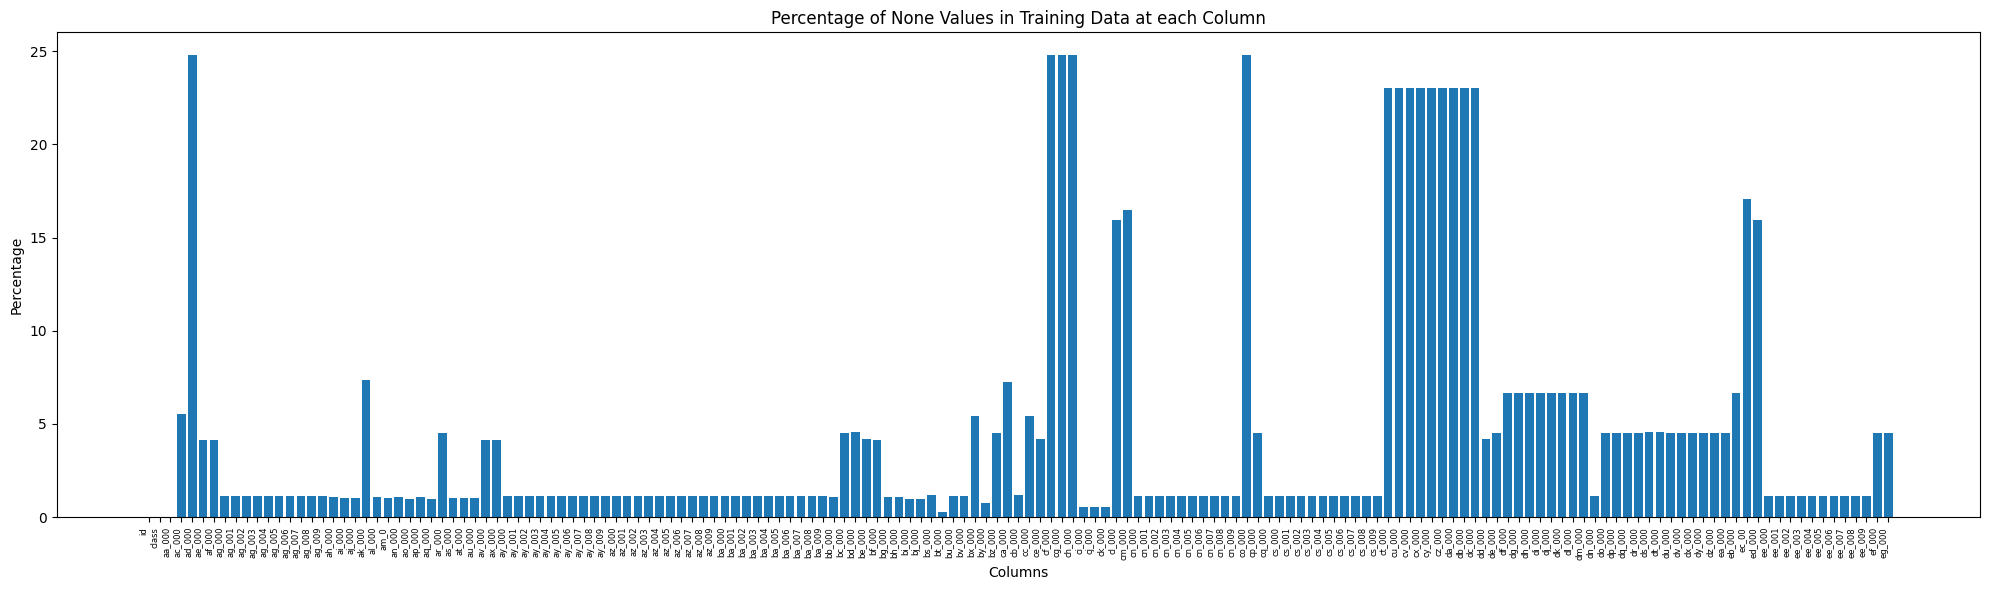

In [180]:
training_nan_percaentage = pd.DataFrame(list(nonePercaentageTrainingData.items()), columns=['Column', 'percentage'])
plt.figure(figsize=(20, 6))
plt.bar(training_nan_percaentage['Column'], training_nan_percaentage['percentage'])
plt.xticks(rotation=90, ha='right', fontsize=6) 
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of None Values in Training Data at each Column')
plt.tight_layout()
plt.show()

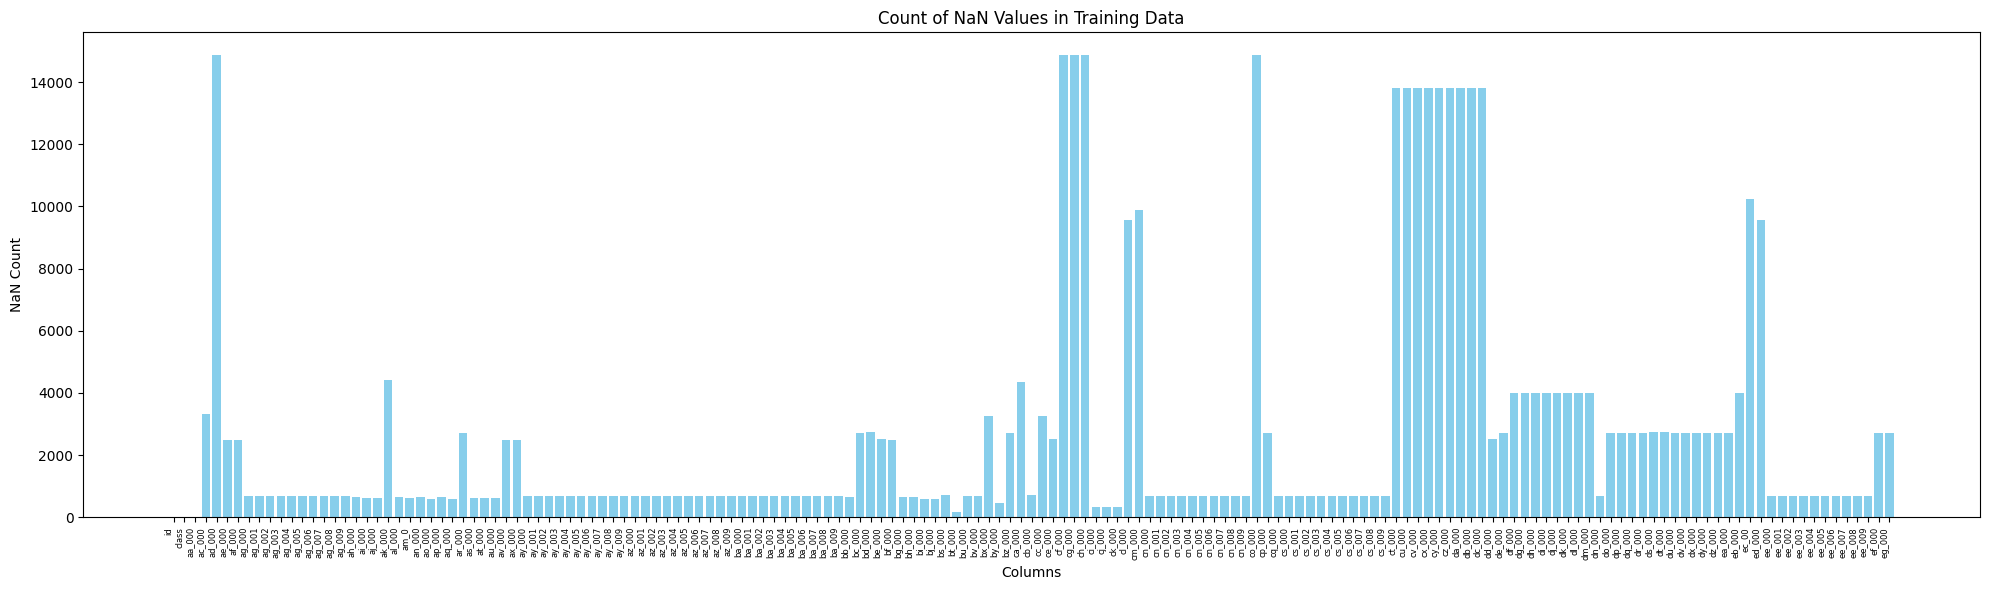

In [181]:
training_nan_counts_df = pd.DataFrame(list(counterTrainingData.items()), columns=['Column', 'NaN Count'])

# and plot them
plt.figure(figsize=(20, 6))
plt.bar(training_nan_counts_df['Column'], training_nan_counts_df['NaN Count'], color='skyblue')
plt.xticks(rotation=90, ha='right', fontsize=6) 
plt.xlabel('Columns')
plt.ylabel('NaN Count')
plt.title('Count of NaN Values in Training Data')
plt.tight_layout()
plt.show()


In [182]:
# ag,ay,az,ba,cn,cs,ee classes have 10 attributes (e.g. ag_000, ag_001, ..., ag_009)
# ['cd_000'] and ['ab_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'cr_000']
# are dropped but they are not related to the classes mentioned above
trainingData = trainingData.drop(['id', 'class'], axis=1)
trainingData.shape

(60000, 159)

In [183]:
trainingData.dtypes

aa_000      int64
ac_000    float64
ad_000    float64
ae_000    float64
af_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 159, dtype: object

In [184]:
# https://github.com/kkaran0908/IDA-2016/blob/master/Parts%20Failure%20Prediction-soft-impute_V02.ipynb
# https://medium.com/@raviranjankr165/aps-failure-detection-in-scania-trucks-a979cee6ba5d
# https://medium.com/analytics-vidhya/scania-trucks-air-pressure-system-failure-prediction-ad6c43539d38

# naive bayes at some point ...